In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
Y_train[200]

1

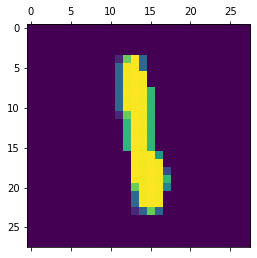

In [34]:
plt.matshow(X_train[200])

# Scaling the dataset

In [35]:
X_train=X_train/255.
X_test=X_test/255.

In [36]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Converting the 28x28 two-dimensional array into a one-dimensional array

In [37]:
X_train_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)

In [38]:
print(X_train_flatten.shape)
X_test_flatten.shape

(60000, 784)


(10000, 784)

In [39]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)), 
    keras.layers.Dense(100,activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')  
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/SDG",histogram_freq=1)

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flatten,Y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6681 - accuracy: 0.8327
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.9047
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.9177
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2632 - accuracy: 0.9259
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2407 - accuracy: 0.9327


In [41]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16000), started 9:23:22 ago. (Use '!kill 16000' to kill it.)

In [42]:
#Evaluating the model
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2250 - accuracy: 0.9370


[0.22495043277740479, 0.9369999766349792]

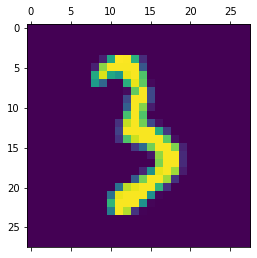

In [43]:
plt.matshow(X_test[44])

In [44]:
y_pred=model.predict(X_test_flatten)
np.argmax(y_pred[44])

3

In [45]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]


[7, 2, 1, 0, 4]

In [46]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
confusion_matrix=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,    8,    3,    2,    0],
       [   0, 1109,    2,    3,    1,    2,    4,    2,   12,    0],
       [   7,    4,  947,   17,   11,    3,   11,   12,   16,    4],
       [   2,    0,   15,  938,    0,   21,    1,   16,   11,    6],
       [   1,    2,    4,    1,  932,    0,   11,    2,    3,   26],
       [   8,    2,    2,   25,    5,  812,   13,    4,   13,    8],
       [  12,    3,    3,    1,   11,   14,  912,    1,    1,    0],
       [   1,    8,   20,    6,    8,    2,    0,  959,    3,   21],
       [   5,    4,    2,   26,   10,   15,   11,   13,  875,   13],
       [   9,    6,    1,   11,   30,    7,    1,   12,    4,  928]])>

# Visualizing the Confusion Matrix

In [48]:
!pip install seaborn


In [49]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

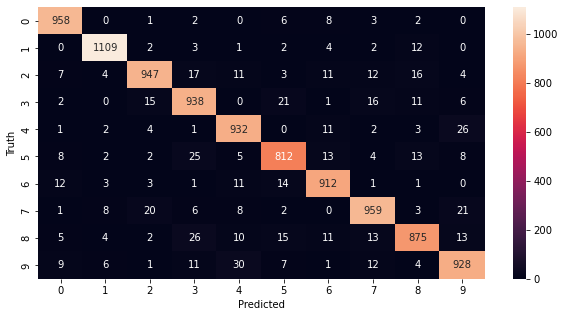

In [50]:
plt.figure(figsize=(10,5))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Improving Model by adding more Layers

In [51]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flatten,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2750 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1251 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0887 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9832


In [52]:
#Evaluating the model
model.evaluate(X_test_flatten,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9701


[0.09644265472888947, 0.9700999855995178]

Text(69.0, 0.5, 'Truth')

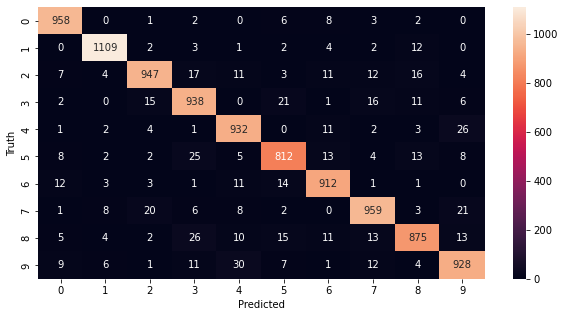

In [53]:
plt.figure(figsize=(10,5))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
